In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [3]:
def fun(x):
    return 4/(1+x**2)

In [4]:
start = 0
end = 1
m_values = np.arange(1, 26)
num_nodes = 2 * m_values + 1


In [5]:
def midpoint_rule(fun, a, b, num_partitions):
    dx = (b - a) / num_partitions
    x_values = np.linspace(a + 0.5 * dx, b - 0.5 * dx, num_partitions)
    integral = np.sum(fun(x_values)) * dx
    return integral

In [6]:
def gauss_legendre_integration(n):
    nodes, weights = np.polynomial.legendre.leggauss(n)
    x_values = 0.5 * (nodes + 1)
    fx_values = fun(x_values)
    integral_approx = np.sum(weights * fx_values)
    integral_approx *= 0.5
    return integral_approx

In [7]:
quad = []
trapezoid = []
simpson = []
errors_midpoint = []
errors_trapezoidal = []
errors_simpson = []
error_gauss_legendre = []
for m in range(1, 26):
    partitions = 2**m + 1
    integral_trapezoidal = integrate.trapezoid(fun(np.linspace(start,end,partitions)), dx=1/partitions)
    integral_simpson = integrate.simpson(fun(np.linspace(start, end, partitions)), dx=1/partitions)
    integral_midpoint = midpoint_rule(fun, start, end, partitions)
    integral_gauss_legendre = gauss_legendre_integration(m)

    simpson.append(integral_simpson)
    trapezoid.append(integral_trapezoidal)
    error_midpoint = np.abs(np.pi - integral_midpoint) / np.pi
    error_trapezoidal = np.abs(np.pi - integral_trapezoidal) / np.pi
    error_simpson = np.abs(np.pi - integral_simpson) / np.pi
    
    error_gauss_legendre.append(np.abs(np.pi - integral_gauss_legendre) / np.pi)
    errors_midpoint.append(error_midpoint)
    errors_trapezoidal.append(error_trapezoidal)
    errors_simpson.append(error_simpson)


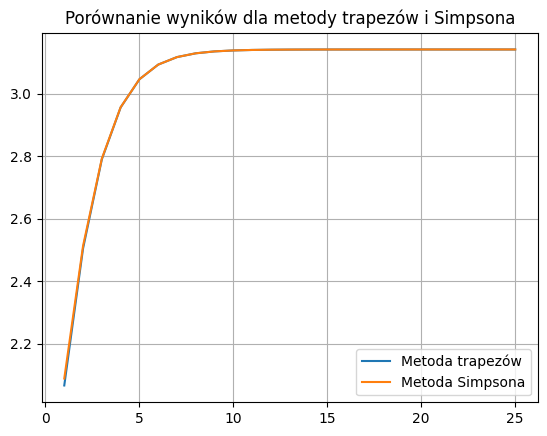

In [8]:
plt.plot(m_values, trapezoid, label='Metoda trapezów')
plt.plot(m_values, simpson, label='Metoda Simpsona')
plt.legend()
plt.grid(True)
plt.title('Porównanie wyników dla metody trapezów i Simpsona')
plt.show()

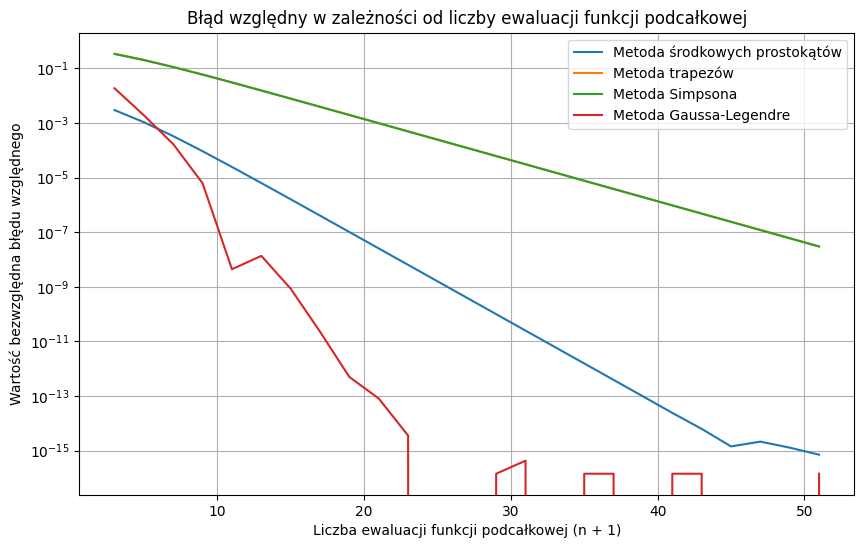

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(num_nodes, errors_midpoint, label='Metoda środkowych prostokątów')
plt.plot(num_nodes, errors_trapezoidal, label='Metoda trapezów')
plt.plot(num_nodes, errors_simpson, label='Metoda Simpsona')
plt.plot(num_nodes, error_gauss_legendre, label='Metoda Gaussa-Legendre')
plt.xlabel('Liczba ewaluacji funkcji podcałkowej (n + 1)')
plt.ylabel('Wartość bezwzględna błędu względnego')
plt.yscale('log')
plt.title('Błąd względny w zależności od liczby ewaluacji funkcji podcałkowej')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
print('Minimalny błąd względny dla metody trapezów: ', np.min(errors_trapezoidal))
print('Wartość h dla której błąd jest najmniejszy dla metody trapezów: ', np.argmin(errors_trapezoidal))
print('Minimalny błąd względny dla metody Simpsona: ', np.min(errors_simpson))
print('Wartość h dla której błąd jest najmniejszy dla metody Simpsona: ', np.argmin(errors_simpson))
print('Minimalny błąd względny dla metody środkowych prostokątów: ', np.min(errors_midpoint))
print('Wartość h dla której błąd jest najmniejszy dla metody środkowych prostokątów: ', np.argmin(errors_midpoint))

Minimalny błąd względny dla metody trapezów:  2.980232251023056e-08
Wartość h dla której błąd jest najmniejszy dla metody trapezów:  24
Minimalny błąd względny dla metody Simpsona:  2.9802319258996884e-08
Wartość h dla której błąd jest najmniejszy dla metody Simpsona:  24
Minimalny błąd względny dla metody środkowych prostokątów:  7.067899292141149e-16
Wartość h dla której błąd jest najmniejszy dla metody środkowych prostokątów:  24


In [11]:
h_min = 9.123695225180455e-09

In [12]:
error_of_h1 = np.abs(h_min - np.min(errors_trapezoidal)) / h_min
error_of_h2 = np.abs(h_min - np.min(errors_simpson)) / h_min
error_of_h3 = np.abs(h_min - np.min(errors_midpoint)) / h_min
print(error_of_h1)
print(error_of_h2)
print(error_of_h3)

2.266475016392397
2.2664746600418617
0.9999999225324925


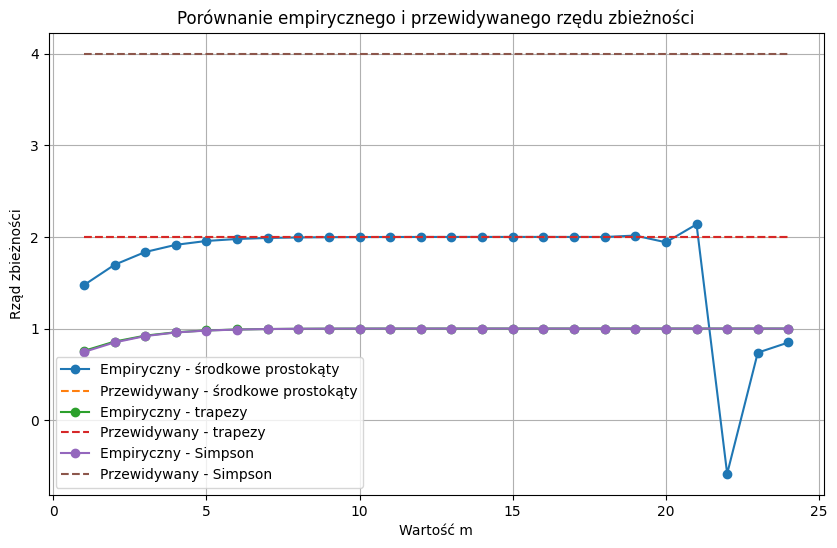

In [13]:
errors_midpoint = np.array(errors_midpoint)
errors_trapezoidal = np.array(errors_trapezoidal)
errors_simpson = np.array(errors_simpson)
orders_midpoint = np.log(errors_midpoint[:-1] / errors_midpoint[1:]) / np.log(2)
orders_trapezoidal = np.log(errors_trapezoidal[:-1] / errors_trapezoidal[1:]) / np.log(2)
orders_simpson = np.log(errors_simpson[:-1] / errors_simpson[1:]) / np.log(2)

predicted_orders_midpoint = np.ones_like(orders_midpoint) * 2
predicted_orders_trapezoidal = np.ones_like(orders_trapezoidal) * 2
predicted_orders_simpson = np.ones_like(orders_simpson) * 4

plt.figure(figsize=(10, 6))
plt.plot(m_values[:-1], orders_midpoint, label='Empiryczny - środkowe prostokąty', marker='o')
plt.plot(m_values[:-1], predicted_orders_midpoint, linestyle='--', label='Przewidywany - środkowe prostokąty')
plt.plot(m_values[:-1], orders_trapezoidal, label='Empiryczny - trapezy', marker='o')
plt.plot(m_values[:-1], predicted_orders_trapezoidal, linestyle='--', label='Przewidywany - trapezy')
plt.plot(m_values[:-1], orders_simpson, label='Empiryczny - Simpson', marker='o')
plt.plot(m_values[:-1], predicted_orders_simpson, linestyle='--', label='Przewidywany - Simpson')
plt.xlabel('Wartość m')
plt.ylabel('Rząd zbieżności')
plt.title('Porównanie empirycznego i przewidywanego rzędu zbieżności')
plt.legend()
plt.grid(True)
plt.show()